In [182]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.nn.utils import parameters_to_vector, vector_to_parameters
from torch.autograd import Variable

In [183]:
#torch.manual_seed(1)

In [184]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [185]:
# Data loader func
def train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size = batch_size, 
                                           shuffle=True)
    return train_loader


def test_loader(batch_size):
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
    return test_loader

In [186]:
class M1(nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.conv2 = nn.Conv2d(3, 13, 5)
        self.fc1 = nn.Linear(208, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [187]:
#train function
def trainFunc(model,num_epochs,train_batch_size):
    model.train()
    print('strated')
    train_load = train_loader(train_batch_size)
    n_total_steps = len(train_load)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        for i, (images, labels) in enumerate(train_load):  
            
            images, labels = Variable(images),Variable(labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            # Backward and optimize
            loss.backward()
            
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            train_losses.append(loss.item())
            train_acc.append(acc)
            train_epoch.append(epoch)

            if (i+1) % 60 == 0:
                print (f'Train O/P: Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
   
                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
    return train_epoch,train_losses,train_acc

In [188]:
# Training Model with batch size=64
torch.manual_seed(1)

learning_rate = 0.0004
mBatch1 = M1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4

optimizer = torch.optim.Adam(mBatch1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

#optimizer = torch.optim.SGD(mBatch1.parameters(), lr=learning_rate)

a=[]
for i in mBatch1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={64} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=64 is:37160


In [189]:
max_epochs = 5
train_batch_size = 64
B1_train_epoch,B1_train_losses,B1_train_acc = trainFunc(mBatch1,max_epochs,train_batch_size)

strated
Max Epoch Reached[5/5], Step [60/938], Loss: 0.14382
Max Epoch Reached[5/5], Step [120/938], Loss: 0.0599
Max Epoch Reached[5/5], Step [180/938], Loss: 0.0448
Max Epoch Reached[5/5], Step [240/938], Loss: 0.0575
Max Epoch Reached[5/5], Step [300/938], Loss: 0.1724
Max Epoch Reached[5/5], Step [360/938], Loss: 0.0660
Max Epoch Reached[5/5], Step [420/938], Loss: 0.0450
Max Epoch Reached[5/5], Step [480/938], Loss: 0.0810
Max Epoch Reached[5/5], Step [540/938], Loss: 0.1094
Max Epoch Reached[5/5], Step [600/938], Loss: 0.1211
Max Epoch Reached[5/5], Step [660/938], Loss: 0.1590
Max Epoch Reached[5/5], Step [720/938], Loss: 0.0656
Max Epoch Reached[5/5], Step [780/938], Loss: 0.1333
Max Epoch Reached[5/5], Step [840/938], Loss: 0.0466
Max Epoch Reached[5/5], Step [900/938], Loss: 0.0537


In [190]:
# Training Model with batch size=1000
torch.manual_seed(1)

learning_rate = 0.0004
mBatch2 = M1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4
optimizer = torch.optim.Adam(mBatch2.parameters(), lr=learning_rate, weight_decay=weight_decay_val) 
#optimizer = torch.optim.SGD(mBatch2.parameters(), lr=learning_rate)

a=[]
for i in mBatch2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={1000} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=1000 is:37160


In [191]:
max_epochs = 5
train_batch_size = 1000
B2_train_epoch,B2_train_losses,B2_train_acc = trainFunc(mBatch2,max_epochs,train_batch_size)

strated
Max Epoch Reached[5/5], Step [60/60], Loss: 0.2689


In [192]:
len(B1_train_losses)

4690

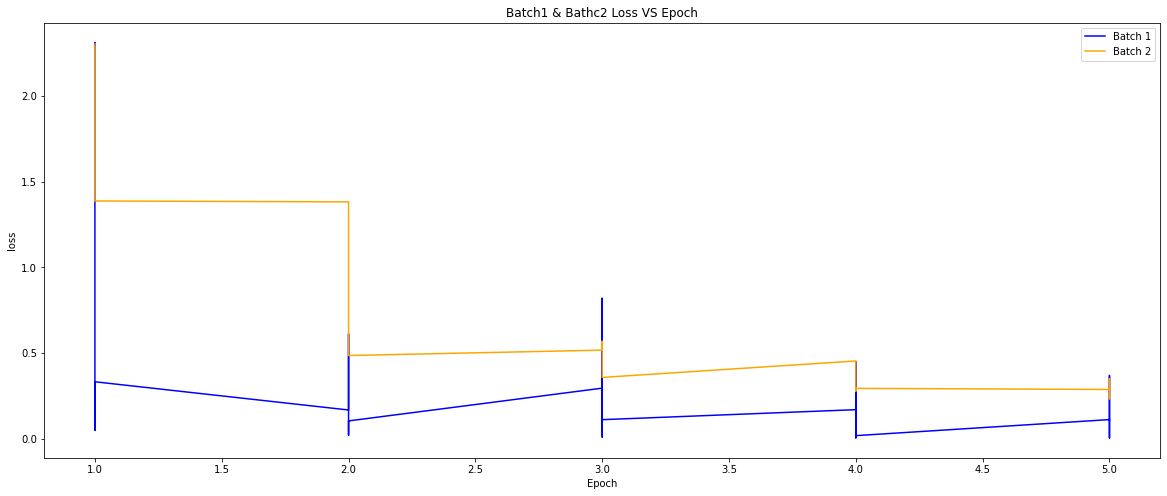

In [193]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
#B2_train_epoch,B2_train_losses,B2_train_acc
plt.figure(figsize=(20, 8))
plt.plot(B1_train_epoch,B1_train_losses,color="blue")
plt.plot(B2_train_epoch,B2_train_losses,color="orange")
plt.title('Batch1 & Bathc2 Loss VS Epoch')
plt.legend(['Batch 1','Batch 2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.show()

In [194]:
print(np.min(B1_train_losses),np.min(B2_train_losses))

0.0054817404597997665 0.23427659273147583


In [195]:
batch1_param = torch.nn.utils.parameters_to_vector(mBatch1.parameters())
print(batch1_param,'\nlen:',len(batch1_param))

tensor([ 0.1522, -0.0374, -0.0054,  ...,  0.0122,  0.0257, -0.0358],
       grad_fn=<CatBackward0>) 
len: 37160


In [196]:
batch2_param = torch.nn.utils.parameters_to_vector(mBatch2.parameters())
print(batch2_param,'\nlen:',len(batch2_param))

tensor([ 0.1628, -0.0238,  0.0298,  ...,  0.0220,  0.0032, -0.0559],
       grad_fn=<CatBackward0>) 
len: 37160


In [197]:
alpha = np.linspace(-2.0, 2.0, num=31)
print(alpha)

[-2.         -1.86666667 -1.73333333 -1.6        -1.46666667 -1.33333333
 -1.2        -1.06666667 -0.93333333 -0.8        -0.66666667 -0.53333333
 -0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4         0.53333333  0.66666667  0.8         0.93333333  1.06666667
  1.2         1.33333333  1.46666667  1.6         1.73333333  1.86666667
  2.        ]


In [198]:
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    thetaArr.append(theta)

In [199]:
class ThetaModel(nn.Module):
    def __init__(self,):
        super(ThetaModel, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.conv2 = nn.Conv2d(3, 13, 5)
        self.fc1 = nn.Linear(208, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [200]:
def testFunction(model,loss_func,testLoader,test_batch_size): 
    test_loader = testLoader
    test_load = test_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        count =0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            count +=1
    netTest_loss = testLoss/n_samples
    netTest_acc1 = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {netTest_acc1} & Test Loss: {netTest_loss} %', end="\r", flush= True)
    return netTest_acc1, netTest_loss

In [201]:
import copy

In [ ]:
modelsTrainEpochArr = []
modelsTrainLossArr = []
modelsTrainAccArr = []
modelsTestLossArr = []
modelsTestAccArr = []

for i in range (len(thetaArr)):
    #torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    j = ThetaModel()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(j.parameters(), lr=0.0004, weight_decay = 1e-4)
    optimizer = torch.optim.SGD(j.parameters(), lr=0.001) 

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    #max_epochs = 1
    train_batch_size = 64
    T_train_acc,T_train_losses = testFunction(j,loss_func,train_loader,train_batch_size)
    #T_train_acc ,T_train_losses = testFunction(j,loss_func,train_batch_size)
    
    
    #modelsTrainEpochArr.append(T_train_epoch)
    modelsTrainLossArr.append(T_train_losses)
    modelsTrainAccArr.append(T_train_acc)
    
    test_batch_size=100
    T_acc, T_testLoss = testFunction(j,loss_func,test_loader,test_batch_size)
    modelsTestAccArr.append(T_acc)
    modelsTestLossArr.append(T_testLoss)




Total no of parameters in Model Theta 0 is:37160
<bound method Module.parameters of ThetaModel(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 13, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=208, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>
Total no of parameters in Model Theta 1 is:371609 & Test Loss: 0.11862292499542236 %35305054982 %
<bound method Module.parameters of ThetaModel(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 13, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=208, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>
Total no of parameters in Model Theta 2 is:371605 & Test Loss: 0.0960203318119049 %22146733602 %
<bound method Module.parameters of ThetaModel(
  (co

In [ ]:
len(modelsTrainAccArr)

31

In [ ]:
def meanScore(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meanScore = np.mean(dataArr[i])
        meanModelData.append(meanScore)
    return meanModelData

def minScore(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minScore = np.mean(dataArr[i])
        minModelScore.append(minScore)
    return minModelScore

def maxScore(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxScore = np.max(dataArr[i])
        maxModelScore.append(maxScore)
    return maxModelScore


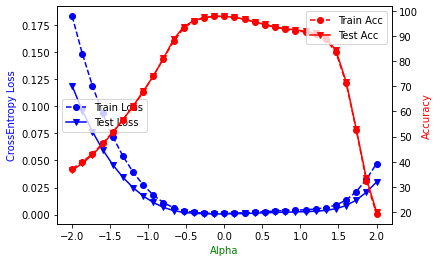

In [ ]:
fig,ax=plt.subplots()
ax.plot(alpha,minScore(modelsTrainLossArr),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")


ax2=ax.twinx()
ax2.plot(alpha,meanScore(modelsTrainAccArr),color="red",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr,color="red", marker="v")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Acc','Test Acc'],loc="upper right")

plt.show()
fig.savefig('D:/Clemson/COURSE/SEM-2/CPSC-8430 Deep Learning - 001/Homework/CPSC-8430-Deep-Learning-001/HW1/Diff Batch Graph HW1_3.1-2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [215]:
# Training Model with batch size=600 and Lr 1e-3
torch.manual_seed(1)

learning_rate = 1e-3
mLr1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr1.parameters(), lr=learning_rate) 

a=[]
for i in mLr1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={600} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=600 is:37160


In [216]:
max_epochs = 15
train_batch_size = 600
L1_train_epoch,L1_train_losses,L1_train_acc = trainFunc(mLr1,max_epochs,train_batch_size)

strated
Max Epoch Reached[15/15], Step [60/100], Loss: 0.0371


In [217]:
Lr1_param = torch.nn.utils.parameters_to_vector(mLr1.parameters())
print(Lr1_param,'\nlen:',len(Lr1_param))

tensor([ 0.1359, -0.0415,  0.0009,  ...,  0.0156,  0.0185, -0.0429],
       grad_fn=<CatBackward0>) 
len: 37160


In [218]:
# Training Model with batch size=600 and Lr 1e-2
torch.manual_seed(1)
learning_rate = 1e-2
mLr2 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr2.parameters(), lr=learning_rate) 

a=[]
for i in mLr2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={600} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=600 is:37160


In [219]:
max_epochs = 15
train_batch_size = 600
L2_train_epoch,L2_train_losses,L2_train_acc = trainFunc(mLr2,max_epochs,train_batch_size)

strated
Max Epoch Reached[15/15], Step [60/100], Loss: 0.0235


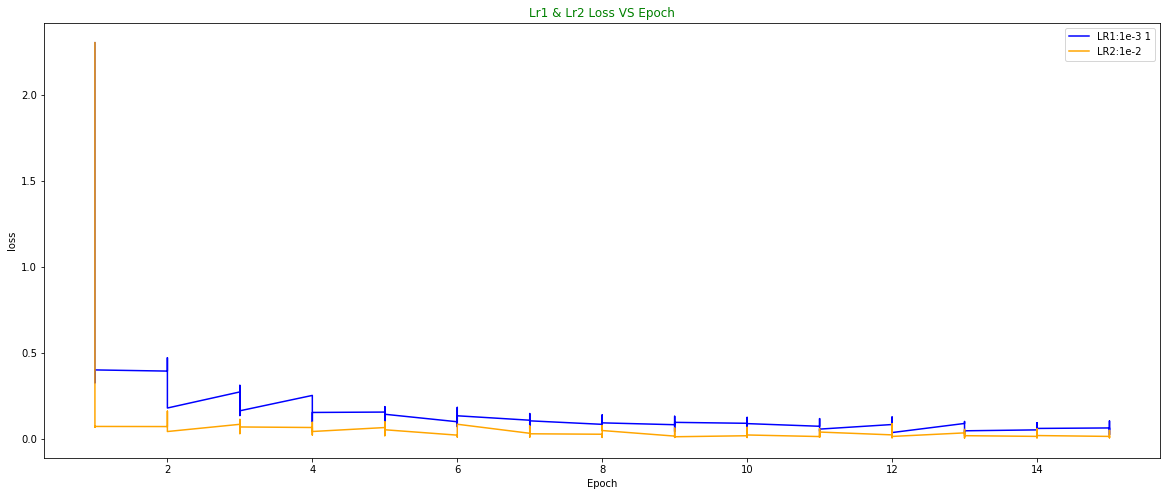

In [220]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
plt.figure(figsize=(20, 8))
plt.plot(L1_train_epoch,L1_train_losses,color="blue")
plt.plot(L2_train_epoch,L2_train_losses,color="orange")
plt.title('Lr1 & Lr2 Loss VS Epoch',color="green")
plt.legend(['LR1:1e-3 1','LR2:1e-2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.show()

In [221]:
Lr2_param = torch.nn.utils.parameters_to_vector(mLr2.parameters())
print(Lr2_param,'\nlen:',len(Lr2_param))

tensor([ 0.1326, -0.0430, -0.0602,  ...,  0.0240,  0.1268, -0.0453],
       grad_fn=<CatBackward0>) 
len: 37160


In [222]:
modelsTrainEpochArr2 = []
modelsTrainLossArr2 = []
modelsTrainAccArr2 = []
modelsTestLossArr2 = []
modelsTestAccArr2 = []

for i in range (len(thetaArr)):
    torch.manual_seed(1)
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*Lr1_param + alpha[i]*Lr2_param
    j = ThetaModel()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3) #,weight_decay = 0.025)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 10
    train_batch_size = 100
    T2_train_epoch,T2_train_losses,T2_train_acc = trainFunc(j,max_epochs,train_batch_size)
    
    
    modelsTrainEpochArr2.append(T2_train_epoch)
    modelsTrainLossArr2.append(T2_train_losses)
    modelsTrainAccArr2.append(T2_train_acc)
    
    test_batch_size=100
    T2_acc,T2_testLoss = testFunction(j,loss_func,test_batch_size)
    modelsTestAccArr2.append(T2_acc)
    modelsTestLossArr2.append(T2_testLoss)

Total no of parameters in Model Theta 0 is:37160
<bound method Module.parameters of ThetaModel(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 13, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=208, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>
strated


In [ ]:
minScore(modelsTrainLossArr2)

[89.62884194614863,
 61.79887772740043,
 42.08576773314613,
 27.694102717806896,
 17.76721482405187,
 11.014632973575795,
 6.572698178871884,
 3.7090218148498875,
 1.9631822247291373,
 1.0177112113306843,
 0.5655763817184294,
 0.28391484476396966,
 0.1413017183856185,
 0.06943830830068327,
 0.04525784298930861,
 0.039741171537641395,
 0.03305051712005661,
 0.02092504599868395,
 0.012272847957333095,
 0.0077360808638877645,
 0.005641960839310741,
 0.004287244827290162,
 0.003704088951099872,
 0.00332471203706506,
 0.003609596868031848,
 0.00465361259817729,
 0.006279159568208365,
 0.010022570470187434,
 0.014064729865678182,
 0.02115848555913043,
 0.030557849257920502]

In [ ]:
meanScore(modelsTrainAccArr2)

[81.44456822040547,
 82.13261913487203,
 82.77886652101176,
 83.61030656132422,
 84.40509838761669,
 85.36985557575807,
 86.57398280195477,
 88.14167627096502,
 89.95553115098623,
 91.53130063083748,
 92.98458981262884,
 94.67069750008962,
 96.18584909313564,
 97.54180568766613,
 98.41494751250983,
 98.71199005081381,
 98.92528109170576,
 99.30129781218571,
 99.58960300838024,
 99.75046654276956,
 99.82538983347176,
 99.86365214636047,
 99.89509540615995,
 99.89469085451289,
 99.89073192278288,
 99.83679538741447,
 99.8037411504239,
 99.71720785736764,
 99.66369181920395,
 99.55447537933436,
 99.47716564922071]

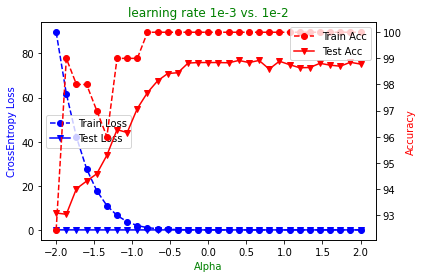

In [ ]:
fig,ax=plt.subplots()
ax.plot(alpha,minScore(modelsTrainLossArr2),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr2,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("learning rate 1e-3 vs. 1e-2",color = "green")


ax2=ax.twinx()
ax2.plot(alpha,maxScore(modelsTrainAccArr2),color="red",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr2,color="red", marker="v")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Acc','Test Acc'],loc="upper right")

plt.show()
fig.savefig('D:/Clemson/COURSE/SEM-2/CPSC-8430 Deep Learning - 001/Homework/CPSC-8430-Deep-Learning-001/HW1/Diff Batch Graph HW1_3.1Lr.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')